# Entregable 2: Houses in London

En el siguiente entregable se trabajará con datos de vivienda en la ciudad de Londres. El dataset incluye variables características de las viviendas como también el precio.
El dataset consta de las siguientes variables:

Columna  | Descripción
:----------:|:----------------------------------------------------------------
|Address | The address of the house
|Neighborhood | The neighborhood or district where the house is located.
|Bedrooms:| The number of bedrooms in the house.
|Bathrooms:| The number of bathrooms in the house.
|Square Meters:| The total size of the house in square meters.
|Building Age:| The age of the building, indicating how long ago it was constructed.
|Garden:| Indicates whether the house has a garden ("Yes" or "No").
|Garage:| Indicates whether the house has a garage ("Yes" or "No").
|Floors:| The total number of floors in the house.
|Property Type:| The type of property, such as "Apartment" or "House."
|Heating Type:| The type of heating system used in the house (e.g., "Central Heating," "Gas").
|Balcony:| Indicates whether the house has a balcony ("Yes" or "No").
|Interior Style:| The interior design style of the house (e.g., "Modern," "Contemporary").
|View:| The type of view from the house (e.g., "City View," "Sea View").
|Materials:| The materials used in the construction of the house (e.g., "Brick," "Wood").
|Building Status:| The current condition of the building (e.g., "New," "Renovated," "Old").
|Price (£):| The sale price of the house, in British pounds (£).


El objetivo es poder entender el dataset pensando siempre que nuestro principal interés es a futuro poder realizar un modelo para poder predecir el valor de la vivienda, por lo tanto, considere esta información al momento de realizar el análisis.


Se solicita lo siguiente:
1) Cargar el dataset
2) Verificar la estructura del dataset y resumen estadístico.
3) Modifique el nombre de las columnas. Se recomienda eliminar espacios y caracteres especiales (i.e £).
4) Graficar la variable de interés Price para revisar su distribución.
5) Genere dos dataset, el primero con las variables categóricas, y el segundo con las variables numéricas. A efectos de análisis, conserve la variable Price en ambos.
6) Grafique todas las variables numéricas.
7) Cuente la cantidad de registros por cada variable categórica.
8) Selecione dos variables categóricas y grafíquelas.
9) Genere un nuevo dataset con información resumida. Debe calcular al menos 3 métricas, considerando también al menos 1 agrupación de datos.
10) Genere gráficos de dispersión entre la variable Square Meters y nuestra variable de interés Price. Añada la linea de regresión.
11) Genere gráficos para la variable Price considerando otras variables.
12) Con toda la información obtenida, ¿qué variables consideraría que aportarían mas a un posible modelo predictivo sobre le precio de la vivienda?

Desde el punto 2) al 11) se espera un análisis e interpretación de lo obtenido.


In [7]:
# Librerías necesarias
library(ggplot2)      # Gráficos
library(dplyr)        # Manipulación de datos

# Configuración de tema para gráficos
theme_set(theme_minimal() + 
          theme(plot.title = element_text(face = "bold", size = 14),
                axis.title = element_text(size = 11)))

#no warning messages
options(warn=-1)


In [8]:
# Instalar paquetes necesarios
if (!require("gridExtra", quietly = TRUE)) {
  install.packages("gridExtra")
}
library(gridExtra)

## **1. Carga del Dataset**

In [9]:
# 1. Carga del dataset
london_houses <- read.csv("london_houses.csv")
head(london_houses)

,Address,Neighborhood,Bedrooms,Bathrooms,Square.Meters,Building.Age,Garden,Garage,Floors,Property.Type,Heating.Type,Balcony,Interior.Style,View,Materials,Building.Status,Price....
,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
2,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
3,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
4,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
5,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000
6,32 Bond Street,Notting Hill,5,2,69,69,Yes,Yes,2,Apartment,Central Heating,Low-level Balcony,Minimalist,Park,Marble,Renovated,736000


## **2. Estructura del Dataset y Resumen Estadístico**

In [10]:
# 2.Verificar la estructura del dataset y resumen estadístico
str(london_houses)
summary(london_houses)

'data.frame':	1000 obs. of  17 variables:
 $ Address        : chr  "78 Regent Street" "198 Oxford Street" "18 Regent Street" "39 Piccadilly Circus" ...
 $ Neighborhood   : chr  "Notting Hill" "Westminster" "Soho" "Islington" ...
 $ Bedrooms       : int  2 2 5 5 4 5 3 5 5 4 ...
 $ Bathrooms      : int  3 1 3 1 1 2 3 2 1 2 ...
 $ Square.Meters  : int  179 123 168 237 127 69 128 130 76 59 ...
 $ Building.Age   : int  72 34 38 53 23 69 24 88 2 79 ...
 $ Garden         : chr  "No" "Yes" "No" "Yes" ...
 $ Garage         : chr  "No" "No" "Yes" "Yes" ...
 $ Floors         : int  3 1 3 1 2 2 2 1 3 3 ...
 $ Property.Type  : chr  "Semi-Detached" "Apartment" "Semi-Detached" "Apartment" ...
 $ Heating.Type   : chr  "Electric Heating" "Central Heating" "Central Heating" "Underfloor Heating" ...
 $ Balcony        : chr  "High-level Balcony" "High-level Balcony" "No Balcony" "No Balcony" ...
 $ Interior.Style : chr  "Industrial" "Industrial" "Industrial" "Classic" ...
 $ View           : chr  "Garden"

   Address          Neighborhood          Bedrooms       Bathrooms    
 Length:1000        Length:1000        Min.   :1.000   Min.   :1.000  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:1.000  
 Mode  :character   Mode  :character   Median :3.000   Median :2.000  
                                       Mean   :3.013   Mean   :2.003  
                                       3rd Qu.:4.000   3rd Qu.:3.000  
                                       Max.   :5.000   Max.   :3.000  
 Square.Meters    Building.Age      Garden             Garage         
 Min.   : 50.0   Min.   : 1.00   Length:1000        Length:1000       
 1st Qu.: 99.0   1st Qu.:24.00   Class :character   Class :character  
 Median :148.0   Median :50.00   Mode  :character   Mode  :character  
 Mean   :149.6   Mean   :49.97                                        
 3rd Qu.:201.0   3rd Qu.:76.00                                        
 Max.   :249.0   Max.   :99.00                                        
     F

En este paso, podemos ver un primer análisis del dataset y del tipo de información que encontramos en él.

#### **1. Estructura del dataset**

- El dataset cuenta con 1000 observaciones (filas) y 17 variables (columnas).

- El nombre de cada variable (por ejemplo: Address, Neighborhood, Bedrooms, Bathrooms, Square.Meters, etc.).

- El tipo de dato de cada columna:

  - chr → texto (character)

  - int → números enteros

- Variables categóricas: Address, Neighborhood, Garden, Garage, Property.Type, etc.

- Variables numéricas: Bedrooms, Bathrooms, Square.Meters, Building.Age, Floors, Price.

La función str() permite identificar el tipo de dato de cada columna, lo que es fundamental para asegurar que las variables están correctamente definidas antes de realizar análisis más avanzados.

### **2. Resumen estadístico**

Por su parte, la función summary() proporciona un resumen estadístico de las variables numéricas, mostrando valores clave como el mínimo, el primer cuartil, la mediana, la media, el tercer cuartil y el valor máximo.

Para Bedrooms (ejemplo):

- Min. → valor mínimo

- 1st Qu. → primer cuartil (25%)

- Median → mediana

- Mean → promedio

- 3rd Qu. → tercer cuartil (75%)

- Max. → valor máximo

Y para las variables de texto (character) muestra:

- Length → número total de registros (1000)

- Class → tipo de dato

- Mode → modo del objeto

#### **3. Utilidad**

A partir de estos datos podemos obtener, de forma rápida, la siguiente información:

- Ver si hay valores extremos (comparando Min y Max).

- Entender cómo están distribuidos los datos (mediana vs media).

- Detectar posibles datos atípicos.

- Confirmar que los tipos de datos son correctos para análisis posteriores.

## **3. Modificación del Nombre de las Columnas**

In [11]:
# 3. Modifique el nombre de las columnas. Se recomienda eliminar espacios y caracteres especiales
colnames(london_houses) <- gsub(" ", "_", colnames(london_houses))
colnames(london_houses) <- gsub("[[:punct:]]", "", colnames(london_houses))

#muestra el nombre de las columnas
head(london_houses)

# Verificar valores faltantes
colSums(is.na(london_houses))

,Address,Neighborhood,Bedrooms,Bathrooms,SquareMeters,BuildingAge,Garden,Garage,Floors,PropertyType,HeatingType,Balcony,InteriorStyle,View,Materials,BuildingStatus,Price
,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
2,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
3,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
4,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
5,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000
6,32 Bond Street,Notting Hill,5,2,69,69,Yes,Yes,2,Apartment,Central Heating,Low-level Balcony,Minimalist,Park,Marble,Renovated,736000


Address   Neighborhood       Bedrooms      Bathrooms   SquareMeters 
             0              0              0              0              0 
   BuildingAge         Garden         Garage         Floors   PropertyType 
             0              0              0              0              0 
   HeatingType        Balcony  InteriorStyle           View      Materials 
             0              0              0              0              0 
BuildingStatus          Price 
             0              0


En esta fase de exploración y organización de datos, he realizado dos tareas críticas para la limpieza y preparación del conjunto de datos de viviendas de Londres antes de proceder a las siguientes tareas:

#### **1. Estandarización y Modificación de Nombres de Columnas**

- Objetivo: Unificar y simplificar el formato de los nombres de las columnas para asegurar la compatibilidad con los lenguajes de programación y metodologías de Machine Learning.

- Acción Ejecutada: Modificar el nombre de las columnas eliminando espacios y caracteres especiales.

- Resultado: Conjunto de nombres de columnas limpios y consistentes, facilitando la programación y minimizando errores durante las siguientes etapas del proyecto.

#### **2. Verificación de Valores Faltantes (Nulos)**

- Objetivo: Comprobar la integridad del conjunto de datos identificando la presencia de valores nulos o faltantes en cualquiera de las variables.

- Acción Ejecutada: Se realizó un conteo de valores nulos por columna.

- Resultado: El análisis arrojó un resultado de cero (0) valores faltantes en todas las columnas, confirmando la alta calidad e integridad de los datos para el modelado.

## **4. Gráfico Price**

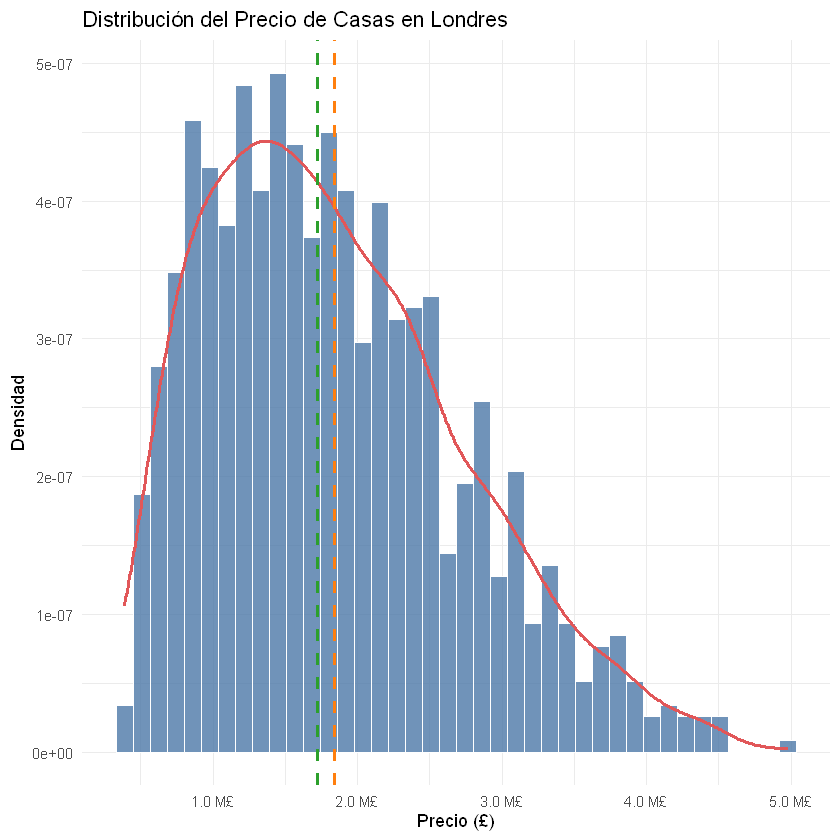

In [12]:
# 4. Distribución de la variable de interés Price
library(scales)

price_mean   <- mean(london_houses$Price, na.rm = TRUE)
price_median <- median(london_houses$Price, na.rm = TRUE)
p99          <- quantile(london_houses$Price, 0.99, na.rm = TRUE)

# Histograma con densidad, líneas de media y mediana, y recorte al p99 para ver mejor la forma
ggplot(london_houses, aes(x = Price)) +
  geom_histogram(aes(y = ..density..), bins = 40, fill = "#4C78A8", color = "white", alpha = 0.8) +
  geom_density(color = "#E15759", size = 1) +
  geom_vline(xintercept = price_median, color = "#2CA02C", linetype = "dashed", size = 1) +
  geom_vline(xintercept = price_mean,   color = "#FF7F0E", linetype = "dashed", size = 1) +
  annotate("text", x = price_median, y = Inf, label = "Mediana", vjust = -0.5, color = "#2CA02C", size = 4) +
  annotate("text", x = price_mean,   y = Inf, label = "Media",   vjust = -0.5, color = "#FF7F0E", size = 4) +
  labs(title = "Distribución del Precio de Casas en Londres",
       x = "Precio (£)", y = "Densidad") +
  scale_x_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
  theme_minimal()

#### **Tipo de gráfico**
Histograma de densidad

#### **Conclusiones**

El mercado inmobiliario de Londres, basado en este gráfico, se caracteriza por una alta concentración de propiedades con precios entre 1.0 M£ y 2.0 M£ (alrededor de la mediana y la moda), pero con una minoría de casas de lujo o premium que alcanzan precios mucho más altos, elevando significativamente el precio promedio (media) de las casas.

## **5. Dataset con Variables Categóricas y Variables Numéricas**

In [13]:
# 5. Genere dos dataset, el primero con las variables categóricas, y el segundo con las variables numéricas. A efectos de análisis, conserve la variable Price en ambos.
categorical_vars <- london_houses %>%
  select(where(is.character), Price)
numerical_vars <- london_houses %>%
    select(where(is.numeric), Price)
head(categorical_vars)
head(numerical_vars)



,Address,Neighborhood,Garden,Garage,PropertyType,HeatingType,Balcony,InteriorStyle,View,Materials,BuildingStatus,Price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,78 Regent Street,Notting Hill,No,No,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
2,198 Oxford Street,Westminster,Yes,No,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
3,18 Regent Street,Soho,No,Yes,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
4,39 Piccadilly Circus,Islington,Yes,Yes,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
5,116 Fleet Street,Marylebone,No,Yes,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000
6,32 Bond Street,Notting Hill,Yes,Yes,Apartment,Central Heating,Low-level Balcony,Minimalist,Park,Marble,Renovated,736000


,Bedrooms,Bathrooms,SquareMeters,BuildingAge,Floors,Price
,<int>,<int>,<int>,<int>,<int>,<int>
1,2,3,179,72,3,2291200
2,2,1,123,34,1,1476000
3,5,3,168,38,3,1881600
4,5,1,237,53,1,1896000
5,4,1,127,23,2,1524000
6,5,2,69,69,2,736000


El código tiene como objetivo principal dividir el dataset original (london_houses) en dos subconjuntos basados en el tipo de dato de las columnas.

En ambos casos, la variable de destino (Price) se mantiene en el nuevo subconjunto para permitir el análisis.

#### **1. Dataset categorical_vars (Variables Categóricas)**
Este dataset contiene 11 variables categóricas más la variable de destino (Price).

#### **2. Dataset numerical_vars (Variables Numéricas)**
Este dataset contiene 5 variables predictivas numéricas más la variable de destino (Price).

La separación permite **aplicar diferentes técnicas de análisis y visualización de manera eficiente:**

- **Análisis Categórico:** Las variables en categorical_vars serán analizadas mediante tablas de frecuencias y gráficos de cajas contra el precio (análisis de varianza).

- **Análisis Numérico:** Las variables en numerical_vars serán analizadas mediante histogramas y diagramas de dispersión contra el precio (análisis de correlación).

## **6. Gráfico de Variables Numéricas**

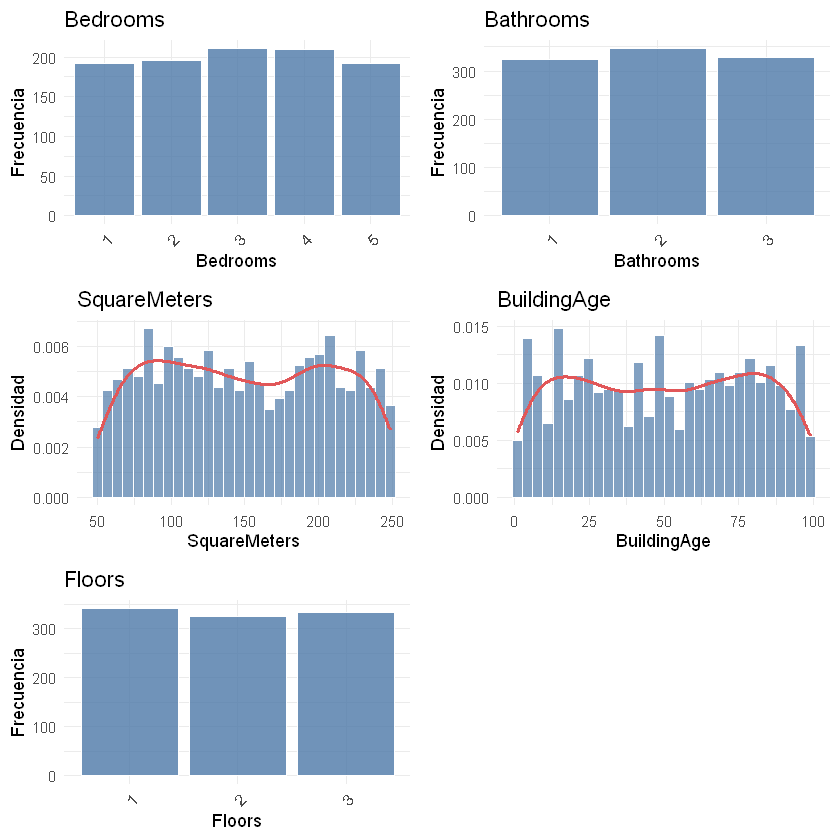

In [14]:
# 6. Grafique todas las variables numéricas
library(gridExtra)

numeric_columns <- numerical_vars %>% select(-Price)

plots <- list()

for (col in colnames(numeric_columns)) {
    data <- numeric_columns[[col]]
    
    # Detectar si la variable es discreta (pocos valores únicos) o continua
    n_unique <- length(unique(data))
    
    if (n_unique <= 10) {
        # Para variables discretas: gráfico de barras
        plots[[col]] <- ggplot(data.frame(value = data), aes(x = factor(value))) +
            geom_bar(fill = "#4C78A8", color = "white", alpha = 0.8) +
            labs(title = col, x = col, y = "Frecuencia") +
            theme_minimal() +
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
    } else {
        # Para variables continuas: densidad + histograma
        plots[[col]] <- ggplot(data.frame(value = data), aes(x = value)) +
            geom_histogram(aes(y = ..density..), bins = 30, fill = "#4C78A8", 
                                         color = "white", alpha = 0.7) +
            geom_density(color = "#E15759", size = 1) +
            labs(title = col, x = col, y = "Densidad") +
            theme_minimal()
    }
}

# Mostrar gráficos en una grilla
gridExtra::grid.arrange(grobs = plots, ncol = 2)


### **Análisis de las Características de las Viviendas**

#### **1. Bedrooms (Dormitorios)**
Tipo de gráfico: Histograma de frecuencias.

Distribución: La distribución es bastante uniforme (1 a 5 dormitorios).

Tendencia Central: La frecuencia de casas con 3 y 4 dormitorios es ligeramente más alta, pero la diferencia con 1, 2 y 5 dormitorios no es drástica.

Conclusión: El conjunto de datos incluye una cantidad similar de casas con 1, 2, 3, 4 y 5 dormitorios.

#### **2. Bathrooms (Baños)**
Tipo de gráfico: Histograma de frecuencias.

Distribución: Al igual que los dormitorios, la distribución de 1, 2 y 3 baños es uniforme y muy alta.

Tendencia Central: Las frecuencias para 1, 2 y 3 baños son casi idénticas y se encuentran por encima de 300.

Conclusión: La gran mayoría de las casas en este conjunto de datos tienen 1, 2 o 3 baños en proporciones muy similares. Las categorías de 4 o más baños no se muestran o son insignificantes.

#### **3. SquareMeters (Metros Cuadrados)**
Tipo de gráfico: Histograma de densidad con curva de suavizado (roja).

Rango: El área de las casas va aproximadamente de 50 a 250 metros cuadrados.

Distribución: La distribución es relativamente uniforme y se asemeja a una forma de meseta.

Hay una ligera tendencia a que la densidad sea mayor en el rango de 100 a 200 m², pero en general, se encuentran casas de todos los tamaños en ese rango de manera constante.

Conclusión: Hay una buena representación de viviendas de pequeño, mediano y gran tamaño (hasta 250 m²) en la muestra.

#### **4. BuildingAge (Antigüedad del Edificio en Años)**
Tipo de gráfico: Histograma de densidad con curva de suavizado (roja).

Rango: La antigüedad de las viviendas abarca desde nuevas (0 años) hasta casi 100 años.

Distribución: La distribución es amplia y plana (uniforme). La curva de densidad muestra fluctuaciones, pero no hay un pico o un sesgo fuerte.

Conclusión: El conjunto de datos está compuesto por una mezcla muy diversa de propiedades de todas las edades (nuevas, medianas y antiguas).

#### **5. Floors (Pisos o Plantas)**
Tipo de gráfico: Histograma de frecuencias.

Distribución: Extremadamente uniforme y alta.

Tendencia Central: Las frecuencias de casas con 1, 2 y 3 plantas son todas muy altas, cerca de 300-320.

Conclusión: El conjunto de datos tiene una cantidad prácticamente igual de casas de 1, 2 y 3 pisos.

## **7. Conteo de Registros en Variables Categóricas**

In [15]:
#7. Cuente la cantidad de registros por cada variable categórica
cat("CONTEO DE VARIABLES CATEGÓRICAS\n")
cat(paste(rep("=", 80), collapse=""), "\n\n")

categorical_counts <- lapply(categorical_vars %>% select(-Price), function(col) {
  as.data.frame(table(col))
})

# Mostrar resultados para cada variable categórica
for (var_name in names(categorical_counts)) {
  cat("\n", var_name, ":\n")
  print(categorical_counts[[var_name]])
  cat("\n")
}

CONTEO DE VARIABLES CATEGÓRICAS


 Address :
                       col Freq
1           1 Baker Street    1
2          1 Regent Street    1
3           10 Bond Street    1
4          10 Fleet Street    1
5             10 Park Lane    1
6     10 Piccadilly Circus    1
7         10 Regent Street    1
8         100 Baker Street    1
9          100 Bond Street    1
10        100 Fleet Street    1
11       100 Oxford Street    1
12           100 Park Lane    1
13         101 Bond Street    2
14        101 Fleet Street    1
15              101 Strand    1
16         102 Bond Street    1
17  102 Camden High Street    1
18         102 King's Road    1
19           102 Park Lane    1
20         103 Bond Street    2
21           103 Park Lane    1
22        104 Baker Street    1
23         104 Bond Street    1
24        104 Fleet Street    1
25       104 Oxford Street    1
26           104 Park Lane    1
27   104 Piccadilly Circus    2
28       104 Regent Street    1
29  105 Camden High Street 

El objetivo del código es calcular la frecuencia de cada categoría para todas las variables identificadas como categóricas en el dataset.

Este paso confirma que la variable Address es inadecuada para el modelado predictivo como variable categórica, ya que su alta cardinalidad y bajo recuento por nivel no permiten un aprendizaje significativo por parte del modelo.

El análisis de conteo de las otras variables categóricas clave (como Neighborhood y PropertyType) demuestra que están bien balanceadas (frecuencias entre 89 y 349 por nivel) y serán útiles para el modelado.

## **8. Gráfico de Dos Variables Categóricas**

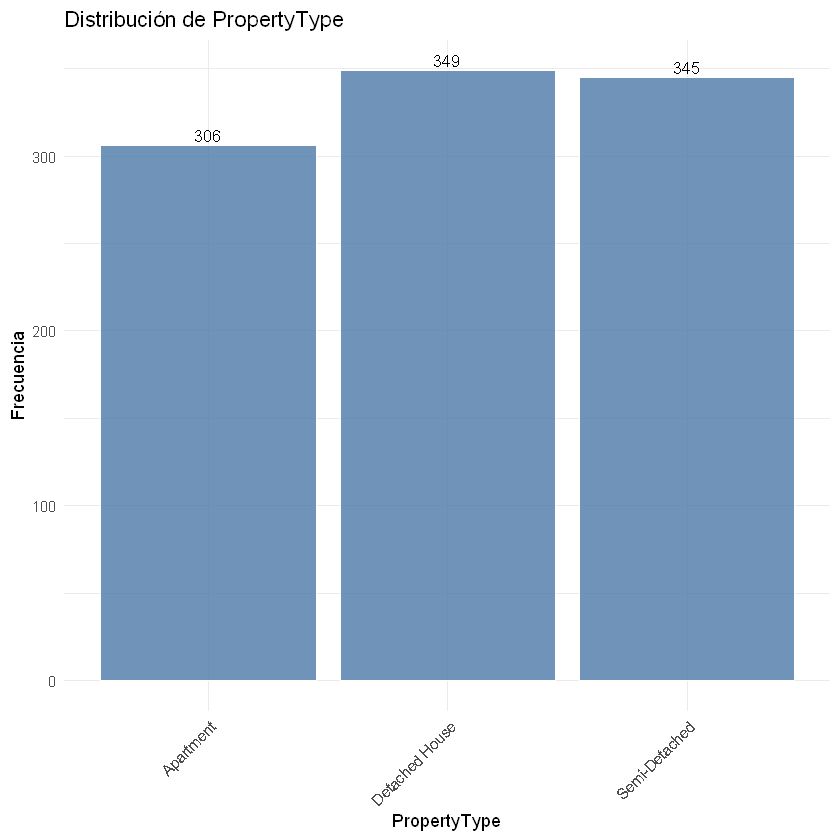

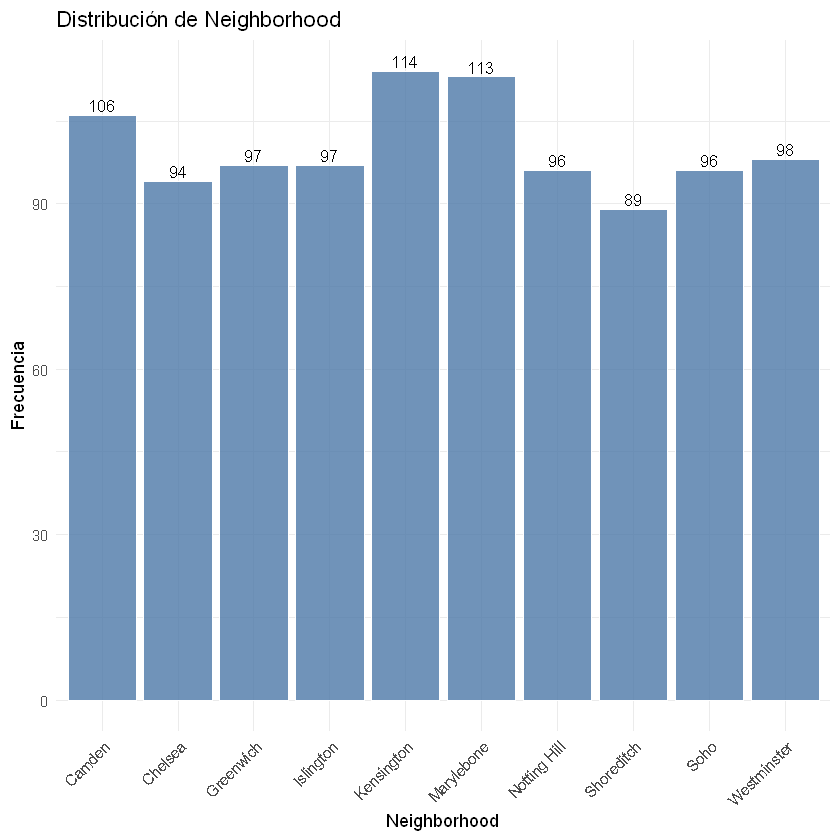

In [16]:
# 8. SSelecione dos variables categóricas y grafíquelas.

# PropertyType
ggplot(categorical_vars, aes(x = PropertyType)) +
    geom_bar(fill = "#4C78A8", color = "white", alpha = 0.8) +
    geom_text(stat = "count", aes(label = ..count..), vjust = -0.3, size = 3.5) +
    labs(title = "Distribución de PropertyType", x = "PropertyType", y = "Frecuencia") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Neighborhood
ggplot(categorical_vars, aes(x = Neighborhood)) +
    geom_bar(fill = "#4C78A8", color = "white", alpha = 0.8) +
    geom_text(stat = "count", aes(label = ..count..), vjust = -0.3, size = 3.5) +
    labs(title = "Distribución de Neighborhood", x = "Neighborhood", y = "Frecuencia") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


#### **Distribución de PropertyType (Tipo de Propiedad)**

Este gráfico de barras muestra la frecuencia de los tres tipos principales de propiedad en el conjunto de datos.

 - Tipos de Propiedad Mayoritarios: Las Casas Unifamiliares (Detached House) (349) y las Casas Adosadas/Semidetached (345) son los tipos de propiedad más comunes, con frecuencias casi idénticas.

- Tipos de Propiedad Minoritarios: Los Apartamentos (Apartment) (306) son el tipo de propiedad menos frecuente en la muestra.

Conclusión: El conjunto de datos tiene una alta representación de casas (unifamiliares y adosadas) en comparación con los apartamentos, pero en general, hay una buena mezcla de los tres tipos.

#### **Distribución de Neighborhood (Barrio)**

El gráfico de barras muestra la frecuencia (número de viviendas) por barrio.

- Tendencia Central: Las frecuencias de viviendas están muy uniformemente distribuidas entre los 10 barrios listados.

- Barrios Más Frecuentes: Kensington (114) y Marylebone (113) son los barrios con mayor número de propiedades en la muestra, aunque la diferencia con otros barrios es mínima.

- Barrios Menos Frecuentes: Shoreditch (89) tiene la menor cantidad de propiedades, seguido de Chelsea (94).

- Rango: El número de propiedades por barrio oscila entre 89 y 114, lo que indica que el conjunto de datos está bien equilibrado geográficamente.

## **9. Dataset con Información Resumida**

In [17]:
#9. Genere un nuevo dataset con información resumida. Debe calcular al menos 3 métricas, considerando también al menos 1 agrupación de datos.
summary_dataset <- london_houses %>%
  group_by(Neighborhood) %>%
  summarise(
    Count = n(),
    AveragePrice = mean(Price, na.rm = TRUE),
    MedianPrice = median(Price, na.rm = TRUE),
    MaxPrice = max(Price, na.rm = TRUE),
    MinPrice = min(Price, na.rm = TRUE)
  ) %>%
  arrange(desc(AveragePrice))

#Separación de millares
options(scipen=999)
library(scales)
summary_dataset$AveragePrice <- comma(summary_dataset$AveragePrice)
summary_dataset$MedianPrice <- comma(summary_dataset$MedianPrice)
summary_dataset$MaxPrice <- comma(summary_dataset$MaxPrice)
summary_dataset$MinPrice <- comma(summary_dataset$MinPrice)
head(summary_dataset)



Neighborhood,Count,AveragePrice,MedianPrice,MaxPrice,MinPrice
<chr>,<int>,<chr>,<chr>,<chr>,<chr>
Chelsea,94,"2,452,894","2,485,333","4,980,000","760,000"
Westminster,98,"2,291,437","2,248,200","4,482,000","672,000"
Kensington,114,"2,282,233","2,234,400","4,427,000","671,333"
Notting Hill,96,"1,957,589","1,874,666","3,936,000","682,666"
Marylebone,113,"1,824,982","1,875,000","3,585,000","530,000"
Soho,96,"1,781,121","1,702,400","3,472,000","532,000"


#### **Análisis de Precios Agrupados por Barrio**

El objetivo de este paso ha sido calcular métricas de tendencia central y dispersión para el precio de las viviendas, segmentando los datos por el barrio (Neighborhood). Esto permite cuantificar el impacto del barrio en el valor de las propiedades.



## **10. Gráfico de Dispersión SquareMeters y Price**

`geom_smooth()` using formula = 'y ~ x'


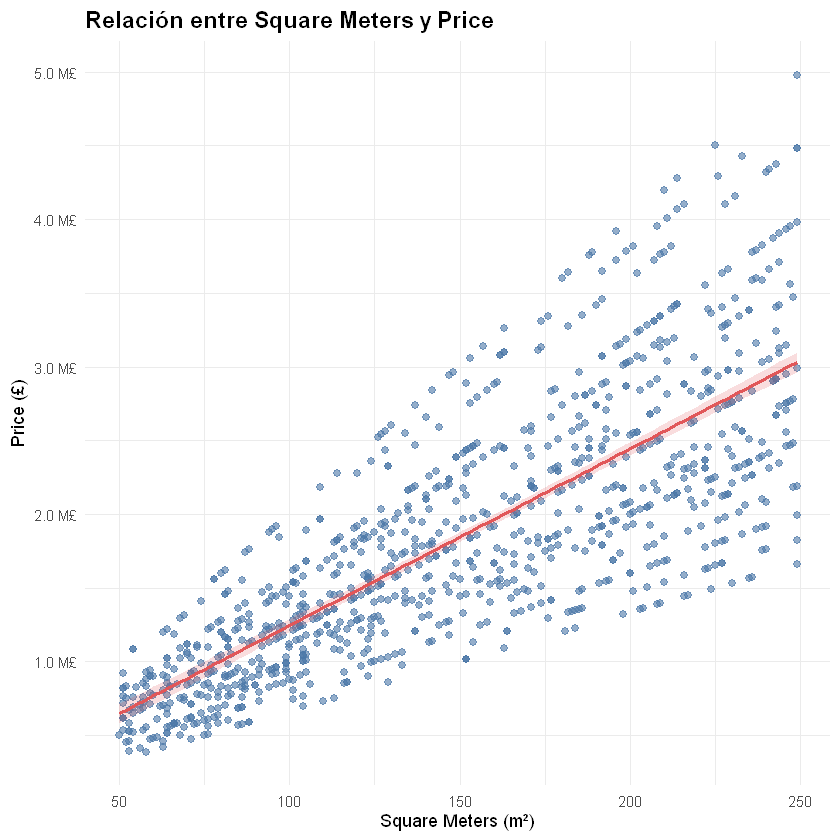

In [18]:
#10. Genere gráficos de dispersión entre la variable Square Meters y nuestra variable de interés Price. Añada la linea de regresión.
ggplot(london_houses, aes(x = SquareMeters, y = Price)) +
    geom_point(alpha = 0.6, color = "#4C78A8", size = 2) +
    geom_smooth(method = "lm", color = "#E15759", se = TRUE, fill = "#E15759", alpha = 0.2) +
    labs(title = "Relación entre Square Meters y Price",
             x = "Square Meters (m²)", 
             y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 14),
                axis.title = element_text(size = 11))


#### **Interpretación**

 A medida que aumenta el tamaño de la vivienda (mayor $m^2$), el precio de la vivienda también aumenta significativamente.

 - Línea de Regresión: La línea roja (que representa la tendencia general) sube constantemente de aproximadamente 0.7 M£ para casas de 50 $m^2$ a casi 3.0 M£ para casas de 250 $m^2$.

 - Dispersión (Varianza): Aunque la tendencia es clara, hay una dispersión significativa de los puntos de datos alrededor de la línea. En la parte baja: Para un tamaño dado (ej. 150 $m^2$), los precios varían desde menos de 1.0 M£ hasta más de 3.0 M£.

 - Implicación: Esto sugiere que $SquareMeters$ es un predictor importante del precio, pero no el único. Otros factores no visibles en este gráfico influyen fuertemente en el precio final.

#### **Conclusión**

El análisis muestra que el conjunto de datos es robusto y muy bien balanceado en términos de sus variables categóricas y de conteo. El análisis de la correlación entre $SquareMeters$ y $Price$ confirma que el tamaño es un factor clave, pero la alta dispersión sugiere la necesidad de incluir variables adicionales en un modelo predictivo para explicar completamente la variación del precio.

## **11. Gráficos de Price Considerando Otras Variables**

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


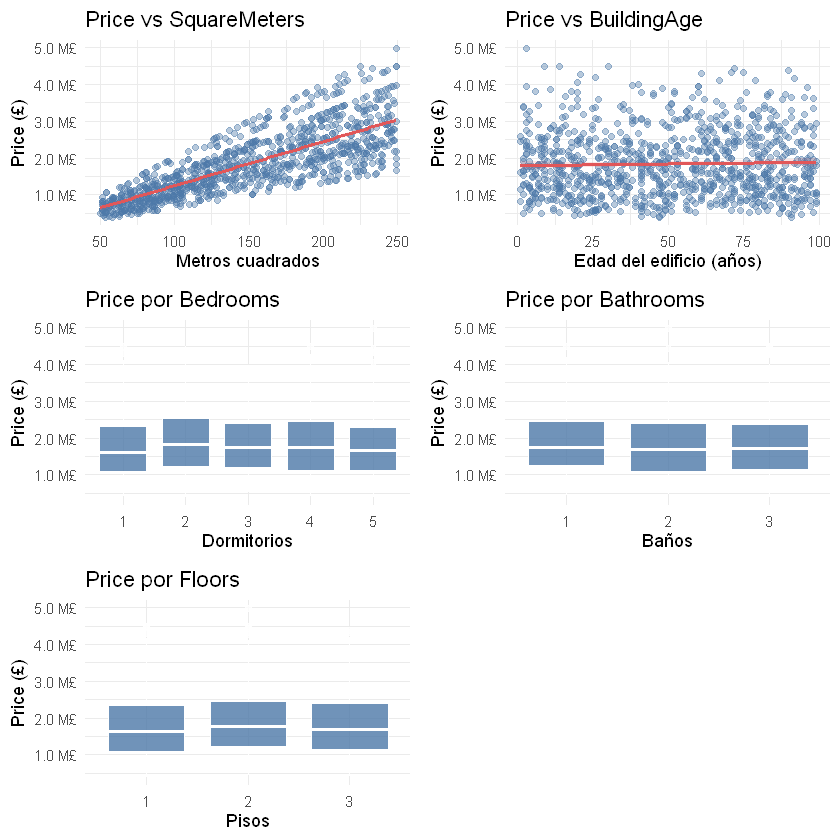

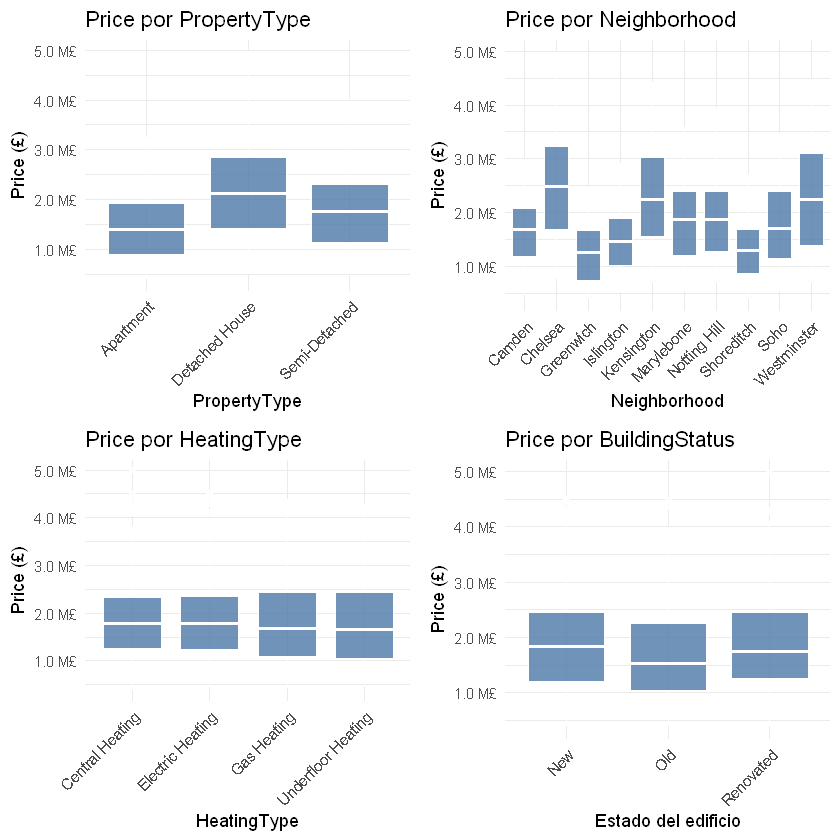

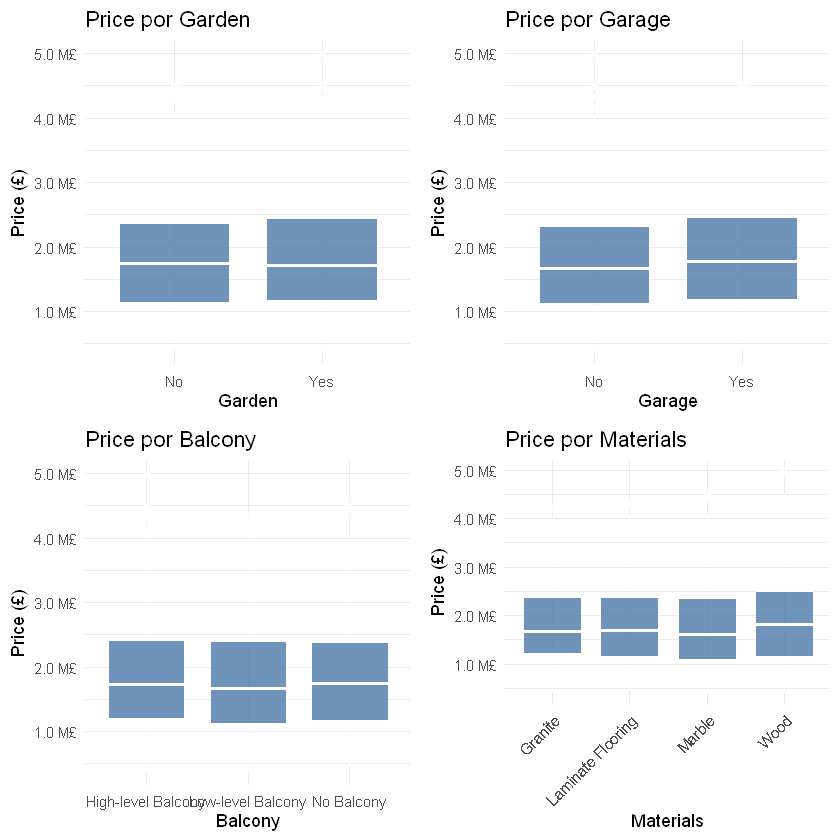

In [22]:
#11. Genere gráficos para la variable Price considerando otras variables.
p_sq   <- ggplot(london_houses, aes(x = SquareMeters, y = Price)) +
    geom_point(alpha = 0.4, color = "#4C78A8") +
    geom_smooth(method = "lm", se = TRUE, color = "#E15759", fill = "#E15759", alpha = 0.15) +
    labs(title = "Price vs SquareMeters", x = "Metros cuadrados", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal()

p_age  <- ggplot(london_houses, aes(x = BuildingAge, y = Price)) +
    geom_point(alpha = 0.4, color = "#4C78A8") +
    geom_smooth(method = "lm", se = TRUE, color = "#E15759", fill = "#E15759", alpha = 0.15) +
    labs(title = "Price vs BuildingAge", x = "Edad del edificio (años)", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal()

p_bed  <- ggplot(london_houses, aes(x = factor(Bedrooms), y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por Bedrooms", x = "Dormitorios", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal()

p_bath <- ggplot(london_houses, aes(x = factor(Bathrooms), y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por Bathrooms", x = "Baños", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal()

p_floor <- ggplot(london_houses, aes(x = factor(Floors), y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por Floors", x = "Pisos", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal()

p_type <- ggplot(london_houses, aes(x = PropertyType, y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por PropertyType", x = "PropertyType", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p_neigh <- ggplot(london_houses, aes(x = Neighborhood, y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por Neighborhood", x = "Neighborhood", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p_heat <- ggplot(london_houses, aes(x = HeatingType, y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por HeatingType", x = "HeatingType", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p_garden <- ggplot(london_houses, aes(x = Garden, y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por Garden", x = "Garden", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal()

p_garage <- ggplot(london_houses, aes(x = Garage, y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por Garage", x = "Garage", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal()

p_balcony <- ggplot(london_houses, aes(x = Balcony, y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por Balcony", x = "Balcony", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal()

p_status <- ggplot(london_houses, aes(x = BuildingStatus, y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por BuildingStatus", x = "Estado del edificio", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p_material <- ggplot(london_houses, aes(x = Materials, y = Price)) +
    geom_boxplot(fill = "#4C78A8", color = "white", alpha = 0.8) +
    labs(title = "Price por Materials", x = "Materials", y = "Price (£)") +
    scale_y_continuous(labels = label_number(scale_cut = cut_si("£"), accuracy = 0.1)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Mostrar en varias grillas para mayor claridad
grid.arrange(p_sq, p_age, p_bed, p_bath, p_floor, ncol = 2)
grid.arrange(p_type, p_neigh, p_heat, p_status, ncol = 2)
grid.arrange(p_garden, p_garage, p_balcony, p_material, ncol = 2)


En este apartado se ha realizado un análisis de la variable price teniendo en cuenta todas las demás variables del dataset.

#### **1.Precio por PropertyType (Tipo de Propiedad)**

Las Casas Unifamiliares son consistentemente las más caras, con la mediana más alta y un rango de precios más elevado. Los Apartamentos son los más baratos. Esto tiene sentido, ya que las casas unifamiliares suelen ser más grandes (como vimos en la correlación de $m^2$) y ofrecer más terreno.

#### **2.Precio por Neighborhood (Barrio)**

Barrios Más Caros (Mediana y rango más alto):

 - Westminster (Rango central 1.5 M£ - 3.0 M£)

 - Notting Hill (Rango central 1.5 M£ - 2.8 M£)

 - Chelsea (Mediana alrededor de 2.0 M£)

Barrios Menos Caros (Mediana y rango más bajo):

 - Greenwich (Rango central 1.0 M£ - 1.5 M£)

 - Shoreditch (Rango central 1.0 M£ - 1.8 M£)

Conclusión: El Barrio es un factor muy influyente en el precio, con claras diferencias entre las áreas de lujo (Westminster, Notting Hill, Chelsea) y las áreas menos caras (Greenwich, Shoreditch).

#### **3.Precio por BuildingStatus (Estado del Edificio)**

Tendencia: Las casas Nuevas tienen una mediana de precio ligeramente más alta que las Antiguas y las Renovadas.

Diferencia: La diferencia entre las tres categorías es mínima en términos de la mediana y el rango central.

Conclusión: El Estado del Edificio (Nuevo, Antiguo, Renovado) no parece ser un factor tan decisivo en el precio como el Tipo de Propiedad o el Barrio.

#### **4.Precio por HeatingType (Tipo de Calefacción)**

Tendencia: Los cuatro tipos de calefacción (Central, Eléctrica, Gas y Suelo Radiante) muestran distribuciones de precio casi idénticas.

Conclusión: El Tipo de Calefacción no tiene un impacto significativo o discriminatorio en el precio de la propiedad.

#### **5.Precio por Garden (Jardín)**

Conclusión: Tener un jardín ("Yes") tiene un rango central de precios ligeramente más alto que no tenerlo ("No"), pero la mediana es casi idéntica (alrededor de 1.7 M£), lo que sugiere que no es un gran impulsor de precio por sí solo.

#### **6.Precio por Garage (Garaje)**

Conclusión: Tener un garaje ("Yes") muestra una mediana de precio notablemente más alta (1.8 M£ vs 1.6 M£) y un rango de precio superior. Esto sugiere que el garaje es una comodidad valorada que impulsa el precio.

#### **7.Precio por Balcony (Balcón)**

Tendencia: Los tres tipos (Balcón de Nivel Alto, Balcón Normal y Sin Balcón) tienen medianas y rangos de precios casi idénticos (alrededor de 1.7 M£).

Conclusión: Tener un balcón o el tipo de balcón no tiene un impacto significativo en el precio.


#### **8. Precio por Materials (Materiales de Construcción)**
Tendencia: Las distribuciones de precio para Granite, Laminate Flooring, Marble y Wood son extremadamente similares, con medianas y rangos que apenas varían.

Conclusión: El tipo de material principal listado no tiene un impacto significativo en el precio de la propiedad.

#### **9.Conclusión Final sobre los Factores de Precio**

Los factores más importantes que influyen en el precio de una vivienda, en orden de impacto, son:

 - SquareMeters (Metros Cuadrados): Correlación lineal positiva fuerte.

 - PropertyType (Tipo de Propiedad): Las casas unifamiliares son significativamente más caras.

 - Neighborhood (Barrio): Los barrios céntricos/de lujo (Westminster, Notting Hill) tienen precios notablemente más altos.

 - Garage (Garaje): Las casas con garaje tienen un precio consistentemente más alto.

Las variables como HeatingType, BuildingStatus, Garden, Materials y Balcony tienen un impacto marginal en la predicción del precio en este conjunto de datos.

## **12. Variables que Aportarían Más a un Posible Modelo Predictivo Sobre el Precio de la Vivienda en Londrés**

Con base en el análisis exhaustivo de todos los gráficos, las variables que aportarían más valor predictivo a un modelo sobre el precio de la vivienda son aquellas que muestran la mayor correlación o la mayor separación en las distribuciones de precios.

Se pueden clasificar en predictoras primarias (de alto impacto) y secundarias (de impacto moderado).

### **Variables Predictivas Primarias (Alto Impacto)**
Estas variables son esenciales para cualquier modelo de predicción, ya que explican la mayor parte de la variación en el precio:

#### SquareMeters (Metros Cuadrados)

 Evidencia: El diagrama de dispersión "Price vs SquareMeters" muestra una correlación positiva, fuerte y lineal con el precio. Un aumento en el tamaño de la vivienda se traduce directamente en un aumento significativo del precio.

#### PropertyType (Tipo de Propiedad)

 Evidencia: El gráfico "Price por PropertyType" muestra una clara jerarquía de precios:

 - Detached Houses (Casas Unifamiliares) son las más caras (mediana de aproximadamente 2.5 M£).

- Semi-Detached (Casas Adosadas) tienen un precio intermedio.

- Apartments (Apartamentos) son los menos caros (mediana de aproximadamente 1.3 M£).

#### Neighborhood (Barrio)

 Evidencia: El gráfico "Price por Neighborhood" revela una alta dispersión en la distribución de precios entre los 10 barrios. Barrios como Westminster y Notting Hill muestran rangos y medianas de precios consistentemente más altos que Greenwich o Shoreditch.

### **Variables Predictivas Secundarias (Impacto Moderado)**

 Estas variables contribuyen a refinar la predicción, especialmente después de tener en cuenta las variables primarias:

#### Garage (Garaje)

 Evidencia: El gráfico "Price por Garage" indica que las propiedades con garaje ("Yes") tienen una mediana de precio más alta que aquellas sin garaje ("No").

### **Variables de Bajo Impacto**
 Las siguientes variables mostraron una diferencia mínima o nula en la distribución del precio y serían menos valiosas o podrían omitirse:

 - BuildingAge (Antigüedad del Edificio): El gráfico de dispersión no muestra correlación (la línea de tendencia es plana).

 - Bedrooms, Bathrooms, Floors: Aunque son atributos físicos, las distribuciones de precios por categoría son muy similares (las medianas apenas varían entre 1 y 5 dormitorios o 1 y 3 baños/pisos). Su efecto ya está mayormente capturado por SquareMeters.

 - HeatingType (Tipo de Calefacción): Las distribuciones de precio son casi idénticas entre las cuatro categorías.

 - BuildingStatus (Estado del Edificio): Las diferencias de precio entre "New", "Old" y "Renovated" son marginales.

 - Garden y Balcony: El impacto en la mediana del precio es mínimo o nulo.
 
 - Materials (Materiales de construcción): El gráfico muestra que el impacto en el precio en mínimo.